In [ ]:
from collections import Counter

import matplotlib.pyplot as plt
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.sentence as nas
import nlpaug.augmenter.word as naw
import nlpaug.flow as nafc
import pandas as pd
from nlpaug.util import Action

In [ ]:
aug = naw.ContextualWordEmbsAug(
    model_path="ai-forever/ruBert-large", action="substitute", aug_p=0.1
)
augmented_text = aug.augment(
    "Однажды он натыкается на «улей» зараженных, живущих во мраке, после того, как его собака забегает в бывший банк, гонясь за оленем."
)
print("Original:")
print(
    "Однажды он натыкается на «улей» зараженных, живущих во мраке, после того, как его собака забегает в бывший банк, гонясь за оленем."
)
print("Augmented Text:")
print(augmented_text)

Original:
Однажды он натыкается на «улей» зараженных, живущих во мраке, после того, как его собака забегает в бывший банк, гонясь за оленем.
Augmented Text:
['однажды он натыкается на « улеи » зараженных, живущих во мраке, после того, ка его собака нападает на бывшии комнату, гонясь за оленем.']


In [ ]:
aug = naw.SynonymAug(aug_src="wordnet", model_path="/wikiwordnet.db")
augmented_text = aug.augment(
    "Однажды он натыкается на «улей» зараженных, живущих во мраке, после того, как его собака забегает в бывший банк, гонясь за оленем."
)
print("Original:")
print(
    "Однажды он натыкается на «улей» зараженных, живущих во мраке, после того, как его собака забегает в бывший банк, гонясь за оленем."
)
print("Augmented Text:")
print(augmented_text)

Original:
Однажды он натыкается на «улей» зараженных, живущих во мраке, после того, как его собака забегает в бывший банк, гонясь за оленем.
Augmented Text:
['Однажды он натыкается на « улей » зараженных, живущих во мраке, после того, как его собака забегает в бывший банк, гонясь за оленем.']


In [ ]:
text = "Однажды он натыкается на «улей» зараженных, живущих во мраке, после того, как его собака забегает в бывший банк, гонясь за оленем."
back_translation_aug = naw.BackTranslationAug(
    from_model_name="Helsinki-NLP/opus-mt-ru-en",
    to_model_name="Helsinki-NLP/opus-mt-en-ru",
)
back_translation_aug.augment(text)

/home/seara/Desktop/Github/mtc-film-classification/.venv/lib/python3.9/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possibl

['Однажды он наткнулся на "улей" инфицированных, живущих в темноте, после того, как его собака побежала в бывший банк, гоняясь за оленем.']

<Figure size 1200x800 with 0 Axes>

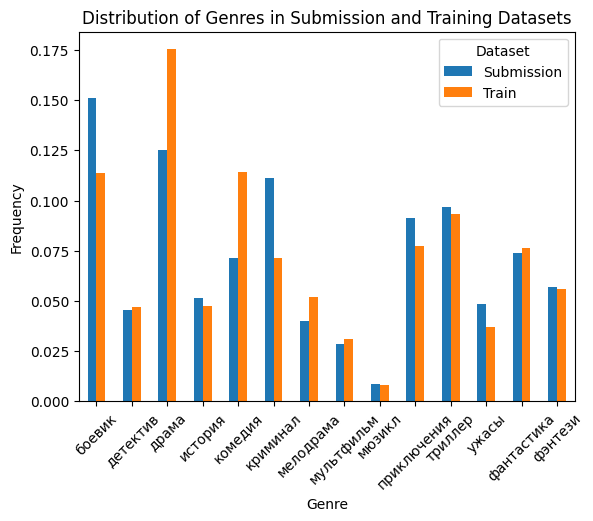

In [ ]:
# Load your datasets into Pandas DataFrames
submission_df = pd.read_csv("submission.csv")  # Replace with your actual dataset file
train_df = pd.read_csv("data/train.csv")  # Replace with your training dataset file

# Process the submission dataset
submission_df["genres_split"] = submission_df["Жанры"].str.split(", ")
submission_exploded = submission_df.explode("genres_split")
submission_genre_counts = submission_exploded["genres_split"].value_counts(normalize=True)

# Process the training dataset
train_df["genres_split"] = train_df["Жанры"].str.split(", ")
train_exploded = train_df.explode("genres_split")
train_genre_counts = train_exploded["genres_split"].value_counts(normalize=True)

# Combine the genre counts from both datasets
combined_counts = pd.DataFrame(
    {"Submission": submission_genre_counts, "Train": train_genre_counts}
).fillna(
    0
)  # Replace NaNs with 0 for missing genres in either dataset

# Plot the histogram
plt.figure(figsize=(12, 8))
combined_counts.plot(kind="bar", stacked=False)
plt.title("Distribution of Genres in Submission and Training Datasets")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.legend(title="Dataset")
plt.show()

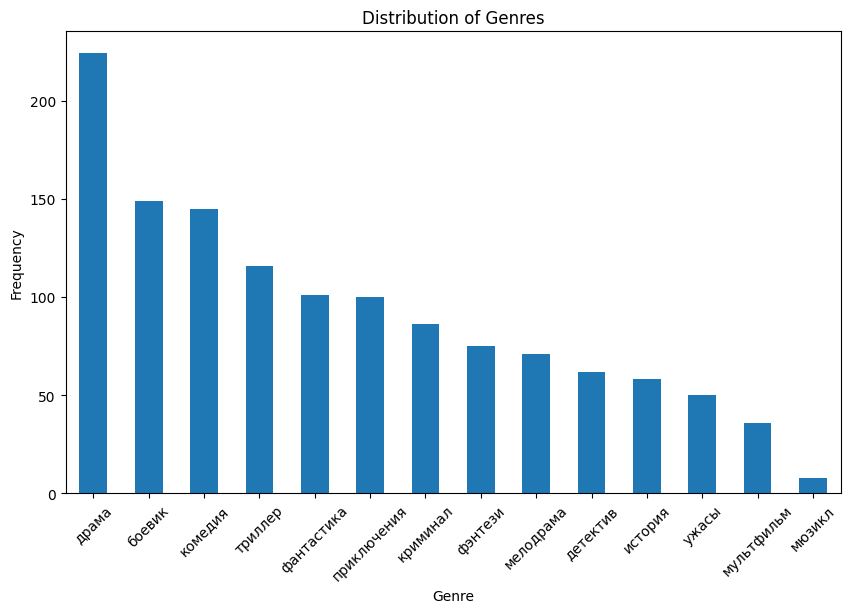

In [ ]:
# Load your dataset into a Pandas DataFrame
df = pd.read_csv("data/train_sample.csv")  # Replace with your actual dataset file

# Split the genres column into multiple rows (assuming genres are separated by commas)
df["genres_split"] = df["Жанры"].str.split(", ")

# Explode the list of genres into separate rows
df_exploded = df.explode("genres_split")

# Get the count of each genre
genre_counts = df_exploded["genres_split"].value_counts()

# Plot a histogram of the genre distribution
plt.figure(figsize=(10, 6))
genre_counts.plot(kind="bar")
plt.title("Distribution of Genres")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

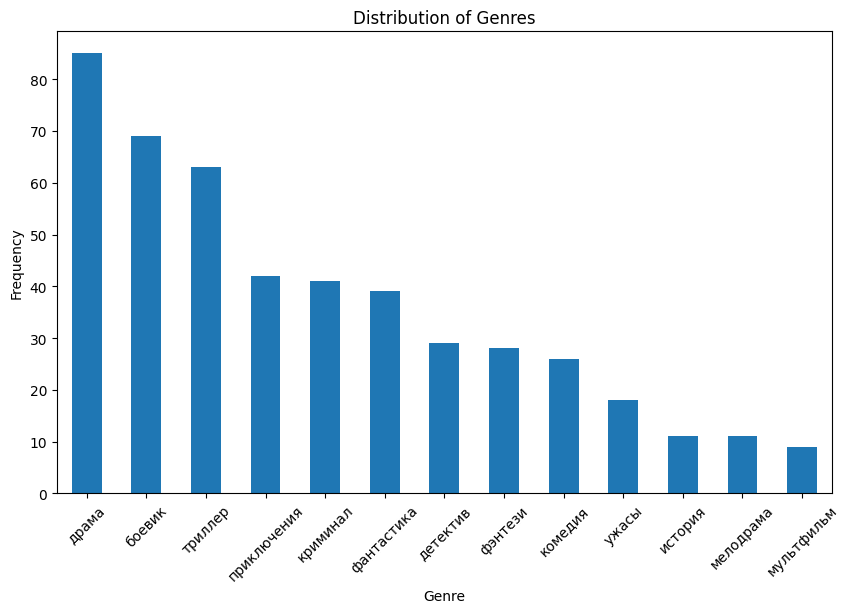

In [ ]:
# Load your dataset into a Pandas DataFrame
df = pd.read_csv("submission.csv")  # Replace with your actual dataset file

# Split the genres column into multiple rows (assuming genres are separated by commas)
df["genres_split"] = df["Жанры"].str.split(", ")

# Explode the list of genres into separate rows
df_exploded = df.explode("genres_split")

# Get the count of each genre
genre_counts = df_exploded["genres_split"].value_counts()

# Plot a histogram of the genre distribution
plt.figure(figsize=(10, 6))
genre_counts.plot(kind="bar")
plt.title("Distribution of Genres")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

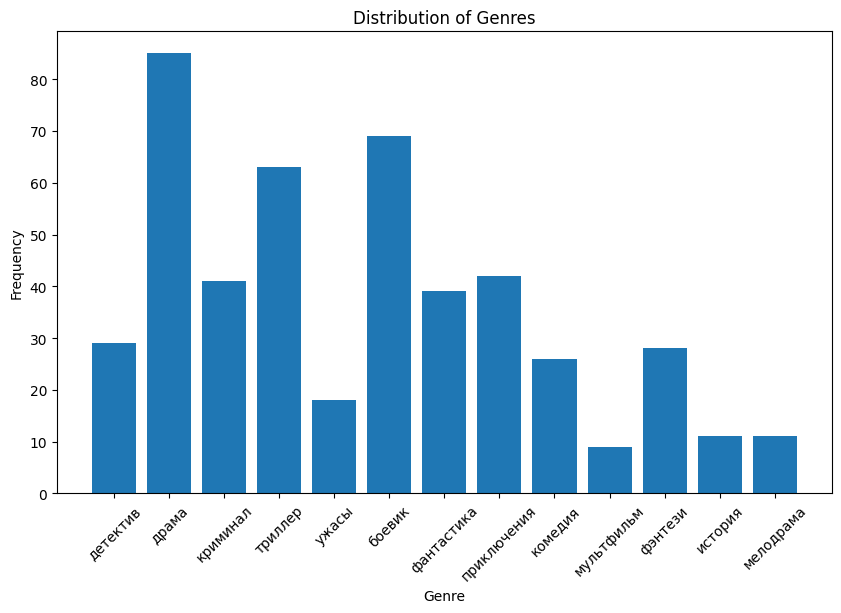

In [ ]:
# Load your dataset into a Pandas DataFrame
df = pd.read_csv("submission.csv")  # Replace with your actual dataset file

# Split the genres column into multiple rows (assuming genres are separated by commas)
df["genres_split"] = df["Жанры"].str.split(", ")

# Explode the list of genres into separate rows
df_exploded = df.explode("genres_split")

# Use Counter to count the occurrences of genres while keeping the initial order
genre_counts = Counter(df_exploded["genres_split"])

# Convert the counter object to a DataFrame to maintain the order
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=["Genre", "Frequency"])

# Plot a histogram of the genre distribution while preserving the order
plt.figure(figsize=(10, 6))
plt.bar(genre_counts_df["Genre"], genre_counts_df["Frequency"])
plt.title("Distribution of Genres")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

TypeError: 'value' must be an instance of str or bytes, not a float

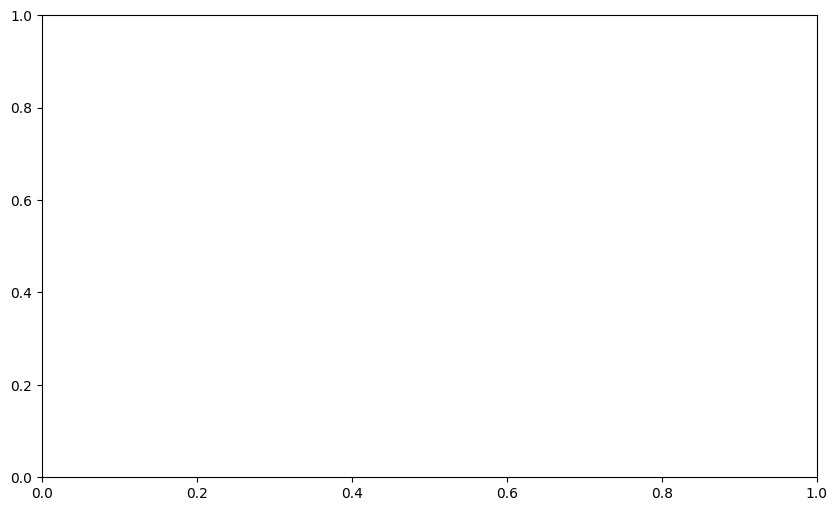

In [ ]:
# Load your dataset into a Pandas DataFrame
df = pd.read_csv("submission.csv")  # Replace with your actual dataset file

# Split the genres column into multiple rows (assuming genres are separated by commas)
df["genres_split"] = df["Жанры"].str.split(", ")

# Explode the list of genres into separate rows
df_exploded = df.explode("genres_split")

# Use Counter to count the occurrences of genres
genre_counts = Counter(df_exploded["genres_split"])

# Convert the counter object to a DataFrame
genre_counts_df = pd.DataFrame(list(genre_counts.items()), columns=["Genre", "Frequency"])

# Define your specific order of genres
custom_order = [
    "драма",
    "комедия",
    "фэнтези",
    "приключения",
    "мультфильм",
    "боевик",
    "история",
]  # Add your genre names here

# Reorder the DataFrame based on the custom order
genre_counts_df["Genre"] = pd.Categorical(
    genre_counts_df["Genre"], categories=custom_order, ordered=True
)
genre_counts_df = genre_counts_df.sort_values("Genre")

# Plot the histogram
plt.figure(figsize=(10, 6))
plt.bar(genre_counts_df["Genre"], genre_counts_df["Frequency"])
plt.title("Distribution of Genres")
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()